In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rc('font', family='NanumBarunGothic')

#### data 불러오기

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종50대.pkl')

In [6]:
# 사용하지 않을 변수 제거
df.drop(['카드_총_이용금액', '카드_총_이용건수', '카드_평일_이용건수','카드_여행사_이용건수'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      143 non-null    object 
 1   농촌마을_수        143 non-null    int64  
 2   농촌마을_체험_평균등급  143 non-null    float64
 3   농촌마을_교육_평균등급  143 non-null    float64
 4   농촌마을_숙박_평균등급  143 non-null    float64
 5   농촌마을_음식_평균등급  143 non-null    float64
 6   농촌마을_으뜸촌_선정수  143 non-null    int64  
 7   카드_관광쇼핑_이용건수  126 non-null    float64
 8   카드_교통_이용건수    113 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    141 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          140 non-null    float64
 13  문화유산          139 non-null    float64
 14  교통            140 non-null    float64
 15  숙박시설          123 non-null    float64
 16  식당및음식         140 non-null    float64
 17  쇼핑            139 non-null    float64
 18  관광지편의시설       140 non-null    

#### 결측치 처리

In [8]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    17
카드_교통_이용건수      30
카드_숙박_이용건수       1
카드_체험_이용건수       2
카드_주말_이용건수       1
자연경관             3
문화유산             4
교통               3
숙박시설            20
식당및음식            3
쇼핑               4
관광지편의시설          3
관광종사자의친절성        3
체험프로그램           8
관광지물가            3
관광지혼잡도           3
재방문의도            3
타인추천의도           3
평균인당비용           3
여행객수             3
dtype: int64

In [9]:
# 뒤 부분 모두 null인 데이터 => 우선 제거하기
df[df['여행객수'].isnull()]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
5,강원 양구군,6,2.000,2.333,1.333,1.000,0,62.0,114.0,5722.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,경북 울주군,1,3.000,1.996,3.000,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,충남 계룡시,1,1.815,1.996,1.860,1.824,0,12.0,NaN,10813.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(df[df['여행객수'].isnull()].index, axis=0).reset_index(drop=True)

In [11]:
# 다시 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    16
카드_교통_이용건수      28
카드_숙박_이용건수       0
카드_체험_이용건수       1
카드_주말_이용건수       0
자연경관             0
문화유산             1
교통               0
숙박시설            17
식당및음식            0
쇼핑               1
관광지편의시설          0
관광종사자의친절성        0
체험프로그램           5
관광지물가            0
관광지혼잡도           0
재방문의도            0
타인추천의도           0
평균인당비용           0
여행객수             0
dtype: int64

In [12]:
# 이용건수는 0으로
for i in range(12):
  df.iloc[:, i] = df.iloc[:, i].fillna(0)

In [13]:
# 만족도는 평균값으로
for i in range(12, 26):
  df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].mean())

#### 변수별 분포 확인

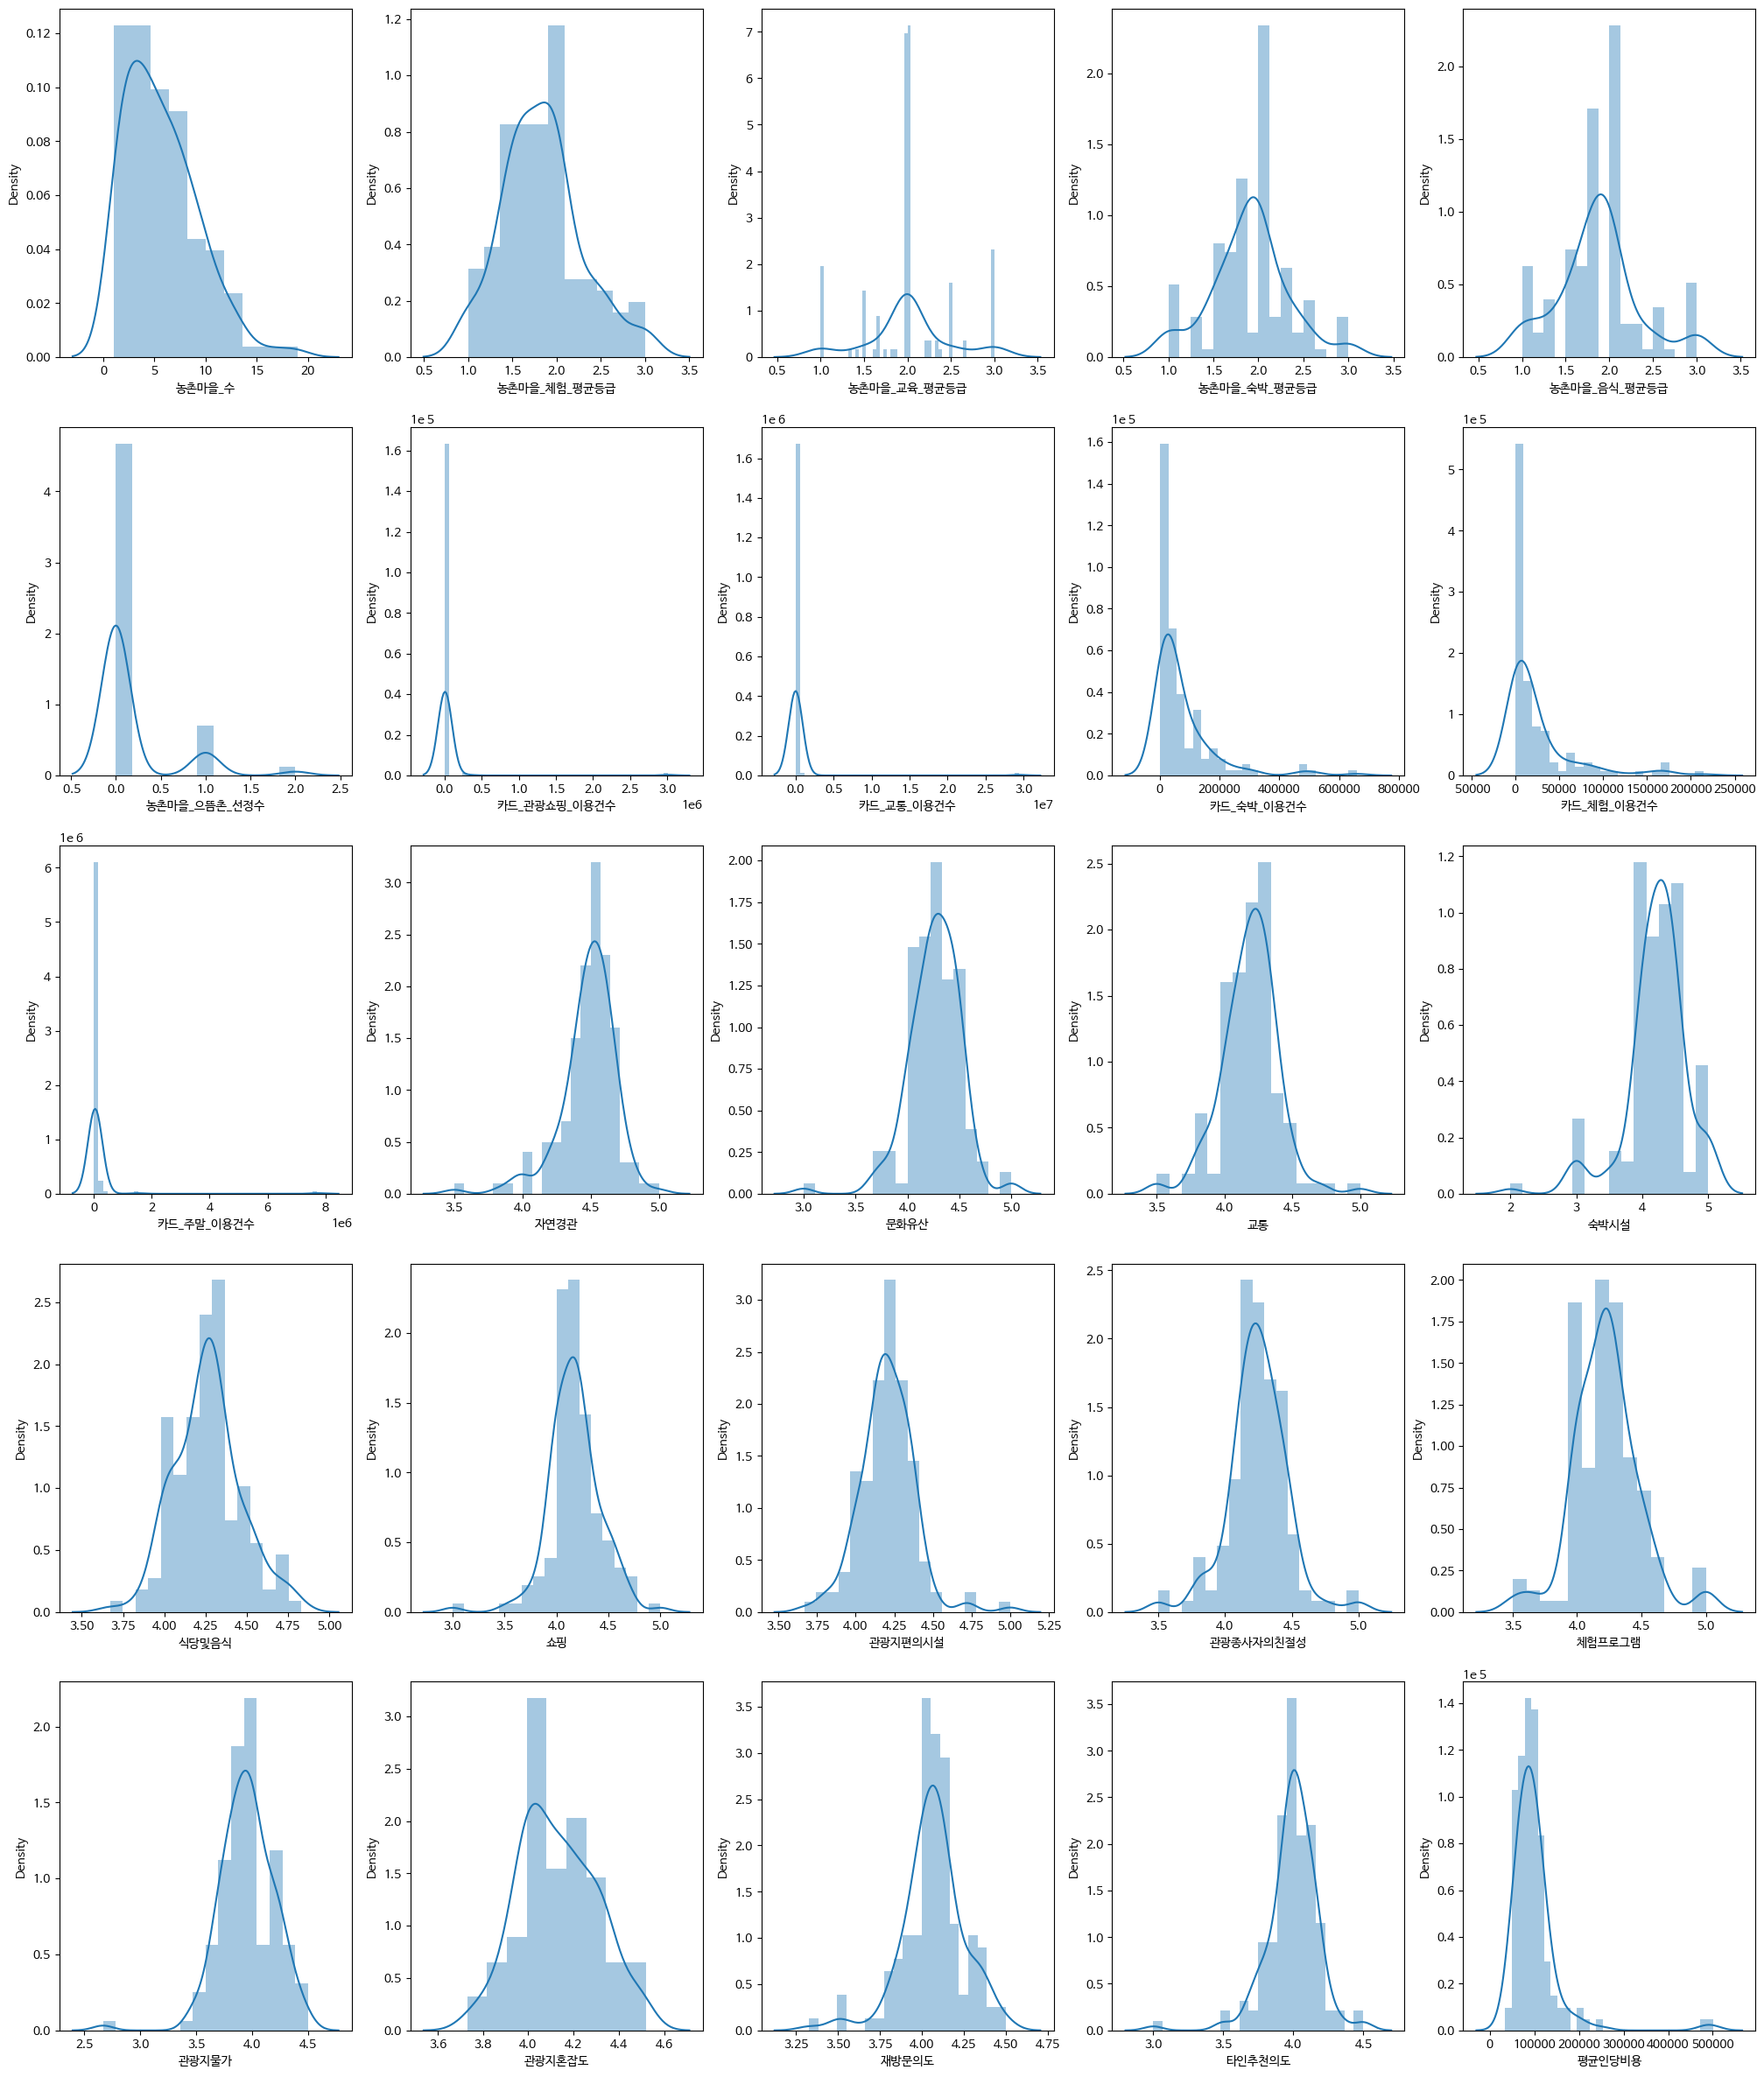

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df.iloc[:, idx+1], ax=ax)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      140 non-null    object 
 1   농촌마을_수        140 non-null    int64  
 2   농촌마을_체험_평균등급  140 non-null    float64
 3   농촌마을_교육_평균등급  140 non-null    float64
 4   농촌마을_숙박_평균등급  140 non-null    float64
 5   농촌마을_음식_평균등급  140 non-null    float64
 6   농촌마을_으뜸촌_선정수  140 non-null    int64  
 7   카드_관광쇼핑_이용건수  140 non-null    float64
 8   카드_교통_이용건수    140 non-null    float64
 9   카드_숙박_이용건수    140 non-null    float64
 10  카드_체험_이용건수    140 non-null    float64
 11  카드_주말_이용건수    140 non-null    float64
 12  자연경관          140 non-null    float64
 13  문화유산          140 non-null    float64
 14  교통            140 non-null    float64
 15  숙박시설          140 non-null    float64
 16  식당및음식         140 non-null    float64
 17  쇼핑            140 non-null    float64
 18  관광지편의시설       140 non-null    

#### 편차 큰 컬럼 - 로그변환

In [16]:
# 카드 관련 컬럼 로그변환하기
df_log = df.copy()
df_log.iloc[:, 7:12] = np.log1p(df_log.iloc[:, 7:12])
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

#### 로그변환 + 모든변수 표준 scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
df_scaled = df_log.copy()
scaler = StandardScaler()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [19]:
df_scaled

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,1.772260,-0.936755,0.677774,-0.949614,-0.671130,-0.398673,1.273296,0.974891,1.737443,...,-0.128951,0.438131,0.020521,-2.973184e-01,-0.477628,-0.296217,0.281968,0.085488,1.326746,1309387.3
1,강원 고성군,-1.024994,0.363572,2.087330,0.227170,0.281497,-0.398673,0.832683,-0.443618,1.463752,...,0.032165,0.266315,-0.116285,-1.782146e-01,-1.055855,-1.346098,0.444418,0.872135,1.979954,300387.5
2,강원 동해시,-1.024994,0.363572,-0.025948,-2.126398,-0.096121,-0.398673,0.403826,1.012979,0.603976,...,-0.088672,0.438131,-0.207489,-3.767209e-01,-0.147212,0.637012,0.931770,-0.195458,0.378080,255779.1
3,강원 삼척시,0.933084,-0.194029,-0.025948,-0.445951,0.281497,-0.398673,0.732423,-0.059596,1.069468,...,-0.692855,0.037227,-0.161887,-1.385133e-01,-0.518930,-0.762831,0.390268,0.029299,1.117311,275415.0
4,강원 속초시,-1.304719,0.363572,-0.034401,-0.102330,-0.096121,-0.398673,0.865957,1.887470,1.449978,...,0.153002,-0.420949,-0.617906,2.029176e-02,-0.560232,-0.587850,0.065367,0.310244,1.683661,1135041.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,충북 제천시,0.373633,-0.274324,2.087330,-0.165876,-0.254892,-0.398673,0.672556,-0.074091,0.288214,...,0.475233,1.010851,-0.207489,9.969430e-02,0.307110,0.928645,-0.042933,-0.139269,0.698581,333818.2
136,충북 증평군,-0.465543,0.363572,-0.025948,0.227170,-0.432973,-0.398673,-0.237284,0.262946,-1.008026,...,-0.692855,1.698115,1.160570,-3.526181e-15,-1.881894,-0.762831,-0.367835,0.029299,-2.291025,13472.0
137,충북 진천군,-1.024994,-0.751631,-0.034401,-0.949614,0.281497,-0.398673,-0.473824,-0.429369,-0.017975,...,0.112723,0.724491,2.528628,3.077290e+00,0.885337,0.228724,2.339676,2.838752,-0.461296,41684.1
138,충북 청주시,-0.185818,0.921174,-0.025948,1.639310,2.427052,-0.398673,0.900252,0.837335,1.435784,...,-1.176202,-1.451845,0.202929,1.092226e+00,-0.436326,-1.346098,-0.638586,-1.263050,-0.737706,196739.1


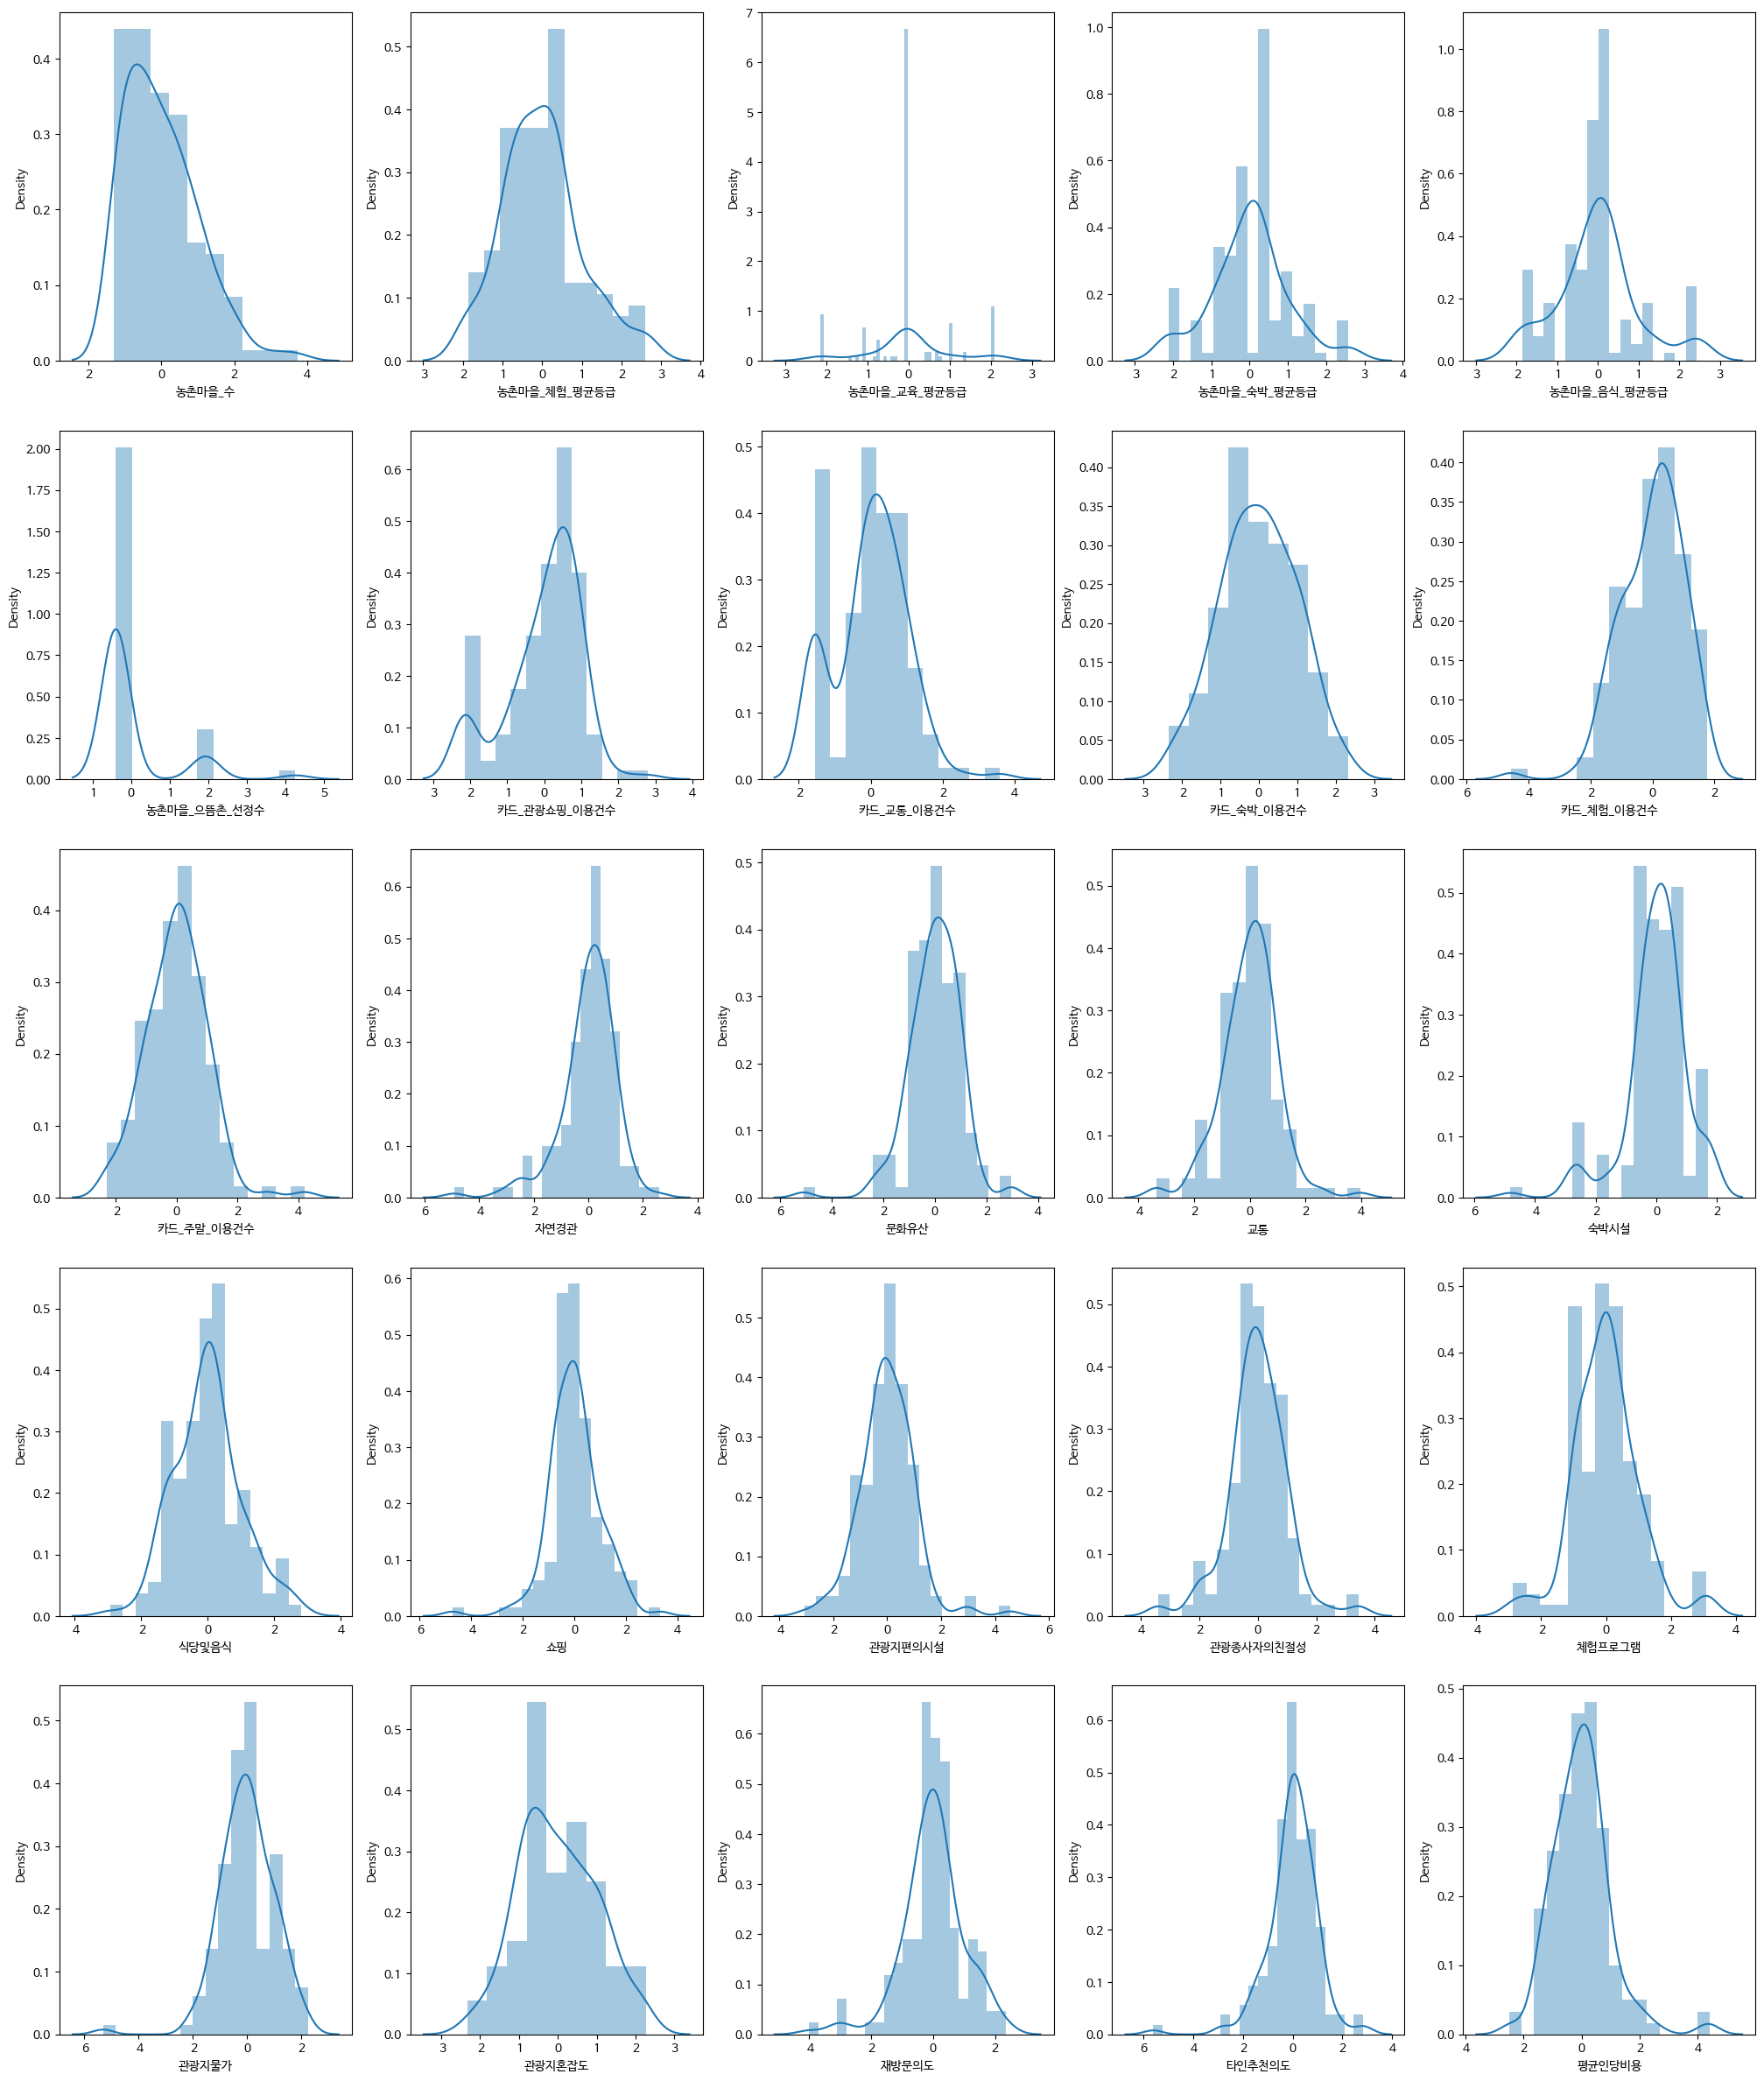

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df_scaled.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df_scaled.iloc[:, idx+1], ax=ax)
plt.show()

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
res = ols('여행객수~' + '+'.join(df_scaled.iloc[:, 1:-1].columns), data=df_scaled.iloc[:, 1:]).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     5.491
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.15e-10
Time:                        14:36:05   Log-Likelihood:                -1901.3
No. Observations:                 140   AIC:                             3855.
Df Residuals:                     114   BIC:                             3931.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.794e+05   1.79e+04     15.595      0.000    2.44e+05    3.15e+05
농촌마을_수        4.524e+04   2.12e+04      2.130      0.035    3170.741    8.73e+04
농촌마을_체험_평균등급  2.741e+04   2.24e+04      1.223      0.224    -1.7e+04    7.18e+04
농촌마을_교육_평균등급  1247.7646   2.08e+04      0.060      0.952      -4e+04    4.25e+04
농촌마을_숙박_평균등급 -1.414e+04   2.27e+04     -0.622      0.535   -5.91e+04    3.08e+04
농촌마을_음식_평균등급 -1.308e+04   2.18e+04     -0.601      0.549   -5.62e+04       3e+04
농촌마을_으뜸촌_선정수  6673.7886   2.41e+04      0.277      0.783   -4.11e+04    5.45e+04
카드_관광쇼핑_이용건수  5.966e+04   2.62e+04      2.276      0.025    7744.039    1.12e+05
카드_교통_이용건수    1.748e+04   2.59e+04      0.676      0.501   -3.38e+04    6.87e+04
카드_숙박_이용건수    2.881e+04   3.85e+04      0.748      0.456   -4.75e+04    1.05e+05
카드_체험_이용건수    7.018e+04   2.85e+04      2.462      0.015    1.37e+04    1.27e+05
카드_주말_이용건수    6221.0074   5.05e+04      0.123      0.902   -9.37e+04    1.06e+05
자연경관         -6002.4014   2.75e+04     -0.218      0.828   -6.05e+04    4.85e+04
문화유산          2.116e+04   2.23e+04      0.947      0.346   -2.31e+04    6.54e+04
교통            5.526e+04   2.46e+04      2.242      0.027    6435.220    1.04e+05
숙박시설         -1.969e+04   2.01e+04     -0.980      0.329   -5.95e+04    2.01e+04
식당및음식         1.397e+04   2.49e+04      0.561      0.576   -3.53e+04    6.33e+04
쇼핑            2.161e+04   2.37e+04      0.913      0.363   -2.53e+04    6.85e+04
관광지편의시설      -1.433e+04   2.31e+04     -0.621      0.536      -6e+04    3.14e+04
관광종사자의친절성    -2.722e+04   2.54e+04     -1.069      0.287   -7.76e+04    2.32e+04
체험프로그램        6688.6405   2.31e+04      0.290      0.772    -3.9e+04    5.24e+04
관광지물가        -3.706e+04    2.4e+04     -1.544      0.125   -8.46e+04    1.05e+04
관광지혼잡도       -1.954e+04   2.84e+04     -0.688      0.493   -7.58e+04    3.67e+04
재방문의도         2.533e+04   3.16e+04      0.803      0.424   -3.72e+04    8.78e+04
타인추천의도         837.7566   3.45e+04      0.024      0.981   -6.76e+04    6.92e+04
평균인당비용        7.179e+04   2.27e+04      3.169      0.002    2.69e+04    1.17e+05
==============================================================================
Omnibus:                       13.296   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.640
Skew:                           0.664   Prob(JB):                     0.000662
Kurtosis:                       3.865   Cond. No.                         7.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_scaled.iloc[:,1:-1].values, i) for i in range(df_scaled.iloc[:,1:-1].shape[1])]
vif['features'] = df_scaled.iloc[:,1:-1].columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.256308,숙박시설
1,1.348734,농촌마을_교육_평균등급
2,1.404985,농촌마을_수
3,1.476329,농촌마을_음식_평균등급
4,1.555591,문화유산
5,1.564022,농촌마을_체험_평균등급
6,1.598834,평균인당비용
7,1.606579,농촌마을_숙박_평균등급
8,1.657280,관광지편의시설
9,1.657665,체험프로그램


### 단계별 선택법

In [23]:
## 전진 단계별 선택법
import statsmodels.api as sm
variables = df_scaled.columns[1:-1].tolist() ## 설명 변수 리스트

y = df_scaled['여행객수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [24]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df_scaled[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df_scaled[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_scaled[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [25]:
selected_variables

['카드_주말_이용건수', '평균인당비용', '카드_관광쇼핑_이용건수', '농촌마을_수', '카드_체험_이용건수', '교통', '관광지물가']

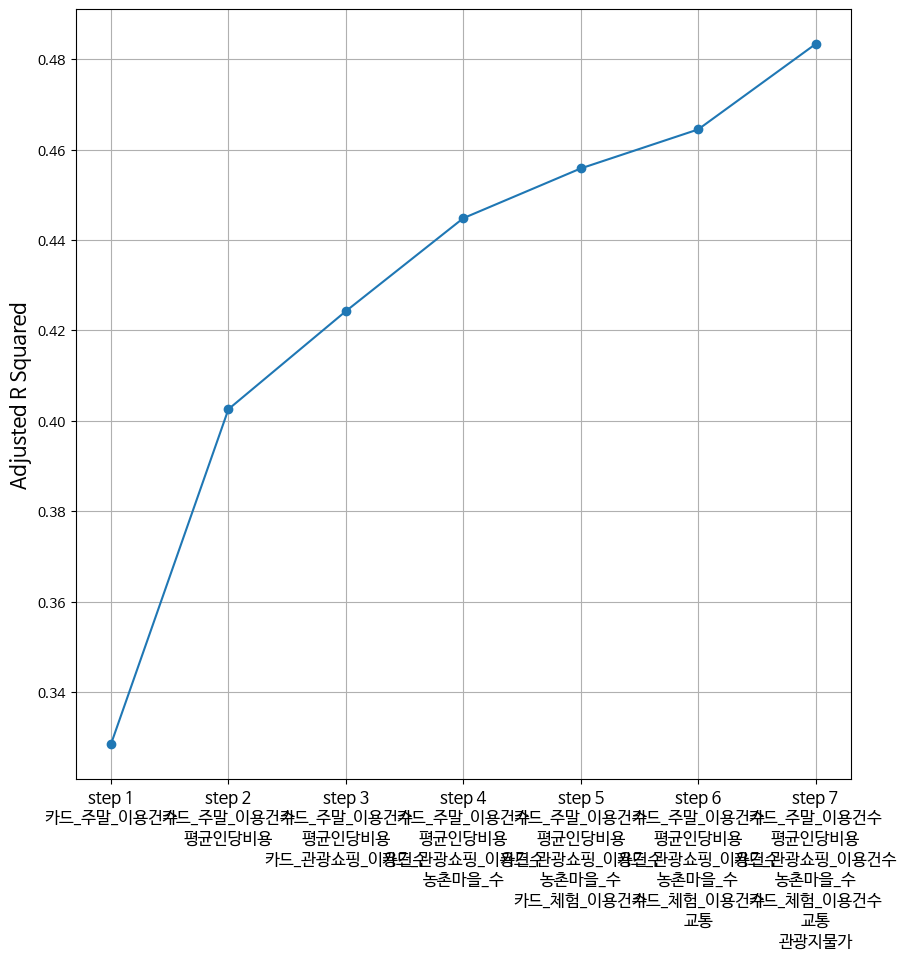

In [26]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 최종으로 회귀분석

In [27]:
selected_variables

['카드_주말_이용건수', '평균인당비용', '카드_관광쇼핑_이용건수', '농촌마을_수', '카드_체험_이용건수', '교통', '관광지물가']

In [28]:
df_final = df_scaled[selected_variables + ['여행객수']]
df_final

,카드_주말_이용건수,평균인당비용,카드_관광쇼핑_이용건수,농촌마을_수,카드_체험_이용건수,교통,관광지물가,여행객수
0,1.357765,1.326746,1.273296,1.772260,0.907203,-0.329026,-0.477628,1309387.3
1,1.154804,1.979954,0.832683,-1.024994,-1.330616,0.546524,-1.055855,300387.5
2,0.185113,0.378080,0.403826,-1.024994,-0.963997,0.108749,-0.147212,255779.1
3,0.587949,1.117311,0.732423,0.933084,-0.623298,0.741091,-0.518930,275415.0
4,1.362475,1.683661,0.865957,-1.304719,1.141626,-0.377668,-0.560232,1135041.7
...,...,...,...,...,...,...,...,...
135,0.722012,0.698581,0.672556,0.373633,1.396360,0.060107,0.307110,333818.2
136,-0.445022,-2.291025,-0.237284,-0.465543,0.640204,-0.912727,-1.881894,13472.0
137,-0.576246,-0.461296,-0.473824,-1.024994,-1.722170,2.346267,0.885337,41684.1
138,0.904196,-0.737706,0.900252,-0.185818,0.495133,-0.669518,-0.436326,196739.1


In [29]:
res = ols('여행객수~' + '+'.join(df_final.iloc[:, :-1].columns), data=df_final).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     19.58
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           8.47e-18
Time:                        14:36:07   Log-Likelihood:                -1906.7
No. Observations:                 140   AIC:                             3829.
Df Residuals:                     132   BIC:                             3853.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.794e+05   1.73e+04     16.137      0.000    2.45e+05    3.14e+05
카드_주말_이용건수    4.938e+04   2.96e+04      1.668      0.098   -9185.206    1.08e+05
평균인당비용        8.072e+04   1.95e+04      4.143      0.000    4.22e+04    1.19e+05
카드_관광쇼핑_이용건수  6.124e+04   2.32e+04      2.643      0.009    1.54e+04    1.07e+05
농촌마을_수        4.178e+04   1.77e+04      2.355      0.020    6686.476    7.69e+04
카드_체험_이용건수    5.441e+04   2.51e+04      2.169      0.032    4791.811    1.04e+05
교통            4.556e+04   1.85e+04      2.464      0.015    8990.040    8.21e+04
관광지물가         -4.43e+04   1.83e+04     -2.421      0.017   -8.05e+04   -8106.084
==============================================================================
Omnibus:                       16.661   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.653
Skew:                           0.757   Prob(JB):                     5.40e-05
Kurtosis:                       4.039   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
selected_variables.sort()
selected_variables

['관광지물가', '교통', '농촌마을_수', '카드_관광쇼핑_이용건수', '카드_주말_이용건수', '카드_체험_이용건수', '평균인당비용']